In [267]:
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import sys
import os
import seaborn as sns
import scipy.stats as ss

In [268]:
data_root = Path("/Volumes/Samsung_T5/MIT/abcd/release_05/abcd-data-release-5.1")
mh_section = "core/mental-health" #mental health 
nc_section = "core/neurocognition" #neurocognition
var_section = "variables" #vars downloaded from data dict 

### CBCL data

In [269]:
cbcl_p_file = 'mh_p_cbcl.csv' #parent cbcl 
cbcl_mapp_file = 'cbcl_p.csv'

cbcl_p = pd.read_csv( Path(data_root, mh_section, cbcl_p_file))
cbcl_mapp = pd.read_csv(Path(data_root, var_section, cbcl_mapp_file))

#child = 'mh_p_cbcl.csv'  
#y_data = pd.read_csv(Path(data_root, mh_section, child))

/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_55162/3346255663.py:4: DtypeWarning: Columns (124,128,132,136,140,144,148,152,156,160,164,168,172,176,180,184,188,192,196,200) have mixed types. Specify dtype option on import or set low_memory=False.
  cbcl_p = pd.read_csv( Path(data_root, mh_section, cbcl_p_file))


### NEUROCOG data

In [270]:
nc_path = Path(data_root, nc_section)
delay_disc = pd.read_csv(Path(nc_path, "nc_y_ddis.csv"))

In [271]:
delay_disc.head()

,src_subject_id,eventname,ddis_scr_script_startdte,ddis_scr_script_starttme,ddis_scr_subjectid,ddis_scr_session,ddis_scr_script_elaptme,ddis_scr_computer_platform,ddis_scr_values_completed,ddis_scr_param_delayrewamt,...,ddis_scr_val_indif_pnt_5yr,ddis_scr_expr_mnrt_allcho,ddis_scr_expr_medrt_allcho,ddis_scr_expr_mnrt_immcho,ddis_scr_expr_medrt_immedcho,ddis_scr_expr_mnrt_delaycho,ddis_scr_expr_medrt_delaycho,ddis_scr_val_cons_per_jbcrit1,ddis_scr_val_jbpass1_num_violations,ddis_scr_val_cons_per_jbcrit2
0,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,2019-09-16,11:13:51,NDAR_INV003RTV85 1_year_follow_up_y_arm_1 01,1,159143,ios,1,100,...,99.21875,1795.6428571428571103752,1428,NaN,NaN,1795.6428571428571103752,1428,yes,0.0,no
1,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,2021-08-04,10:36:31,ABCD_114SUW96 3_year_follow_up_y_arm_1 01,1,232326,and,1,100,...,49.21875,2510.1666666666665,2416,3318.5,2966,2257.5625,2240.5,yes,0.0,yes
2,NDAR_INV005V6D2C,1_year_follow_up_y_arm_1,2019-02-09,14:45:56,NDAR_INV005V6D2C 1_year_follow_up_y_arm_1 01,1,205675,ios,1,100,...,75.78125,1729,1454.5,1730.647059,1643,1727.88,1376,no,2.0,no
3,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,2021-02-12,18:41:32,ABCD_116W7E3D 3_year_follow_up_y_arm_1 01,1,249644,and,1,100,...,50.78125,2486.690476190476,1885.5,2037.692307692308,1540.5,3216.3125,2770,no,1.0,no
4,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,2020-05-12,16:15:57,ABCD_118X7I8C 3_year_follow_up_y_arm_1 01,1,191439,ios,1,100,...,5.46875,1252.85714285714,1189.0,1297.5,1180.5,1235.0,1189.0,yes,0.0,yes


### 1 year follow up correlation cbcl and delay discounting
baseline does not exist in delay discounting

In [272]:
def convert_columns(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
    return df

In [273]:
ddis_1y = delay_disc.query("eventname == '1_year_follow_up_y_arm_1'") # select time batch 
ddis_1y = ddis_1y.query("ddis_scr_values_completed == 1" ) # select completed task 
cbcl_p_1y = cbcl_p.query("eventname == '1_year_follow_up_y_arm_1'") # select time batch 
score_name = 'cbcl_scr_dsm5_adhd_r' #raw, change for t for t-scores 
print(ddis_1y.head(), cbcl_p_1y.head())

     src_subject_id                 eventname ddis_scr_script_startdte  \
0  NDAR_INV003RTV85  1_year_follow_up_y_arm_1               2019-09-16   
2  NDAR_INV005V6D2C  1_year_follow_up_y_arm_1               2019-02-09   
5  NDAR_INV00BD7VDC  1_year_follow_up_y_arm_1               2019-04-24   
6  NDAR_INV00CY2MDM  1_year_follow_up_y_arm_1               2018-09-04   
8  NDAR_INV00HEV6HB  1_year_follow_up_y_arm_1               2018-08-15   

  ddis_scr_script_starttme                            ddis_scr_subjectid  \
0                 11:13:51  NDAR_INV003RTV85 1_year_follow_up_y_arm_1 01   
2                 14:45:56  NDAR_INV005V6D2C 1_year_follow_up_y_arm_1 01   
5                 18:05:33  NDAR_INV00BD7VDC 1_year_follow_up_y_arm_1 01   
6                 18:13:13  NDAR_INV00CY2MDM 1_year_follow_up_y_arm_1 01   
8                 12:10:37  NDAR_INV00HEV6HB 1_year_follow_up_y_arm_1 01   

   ddis_scr_session  ddis_scr_script_elaptme ddis_scr_computer_platform  \
0                 1    

### Indifference points

In [274]:
col2convert = [score_name, 'ddis_scr_val_immedcho', 'ddis_scr_val_indif_point_6h', 'ddis_scr_val_indif_pnt_1da' ,'ddis_scr_val_indif_pnt_1week', 'ddis_scr_val_indif_pnt_1mth','ddis_scr_val_indif_pnt_3mth', 'ddis_scr_val_indif_pnt_1yr', 'ddis_scr_val_indif_pnt_5yr']
cbcl_p_1y_filtered = cbcl_p_1y[['src_subject_id', score_name]].dropna() #extract the score of interest

In [275]:
ddis_1y_filtered = ddis_1y[['src_subject_id','ddis_scr_val_immedcho', 'ddis_scr_val_indif_point_6h', 'ddis_scr_val_indif_pnt_1da' ,'ddis_scr_val_indif_pnt_1week', 'ddis_scr_val_indif_pnt_1mth','ddis_scr_val_indif_pnt_3mth', 'ddis_scr_val_indif_pnt_1yr', 'ddis_scr_val_indif_pnt_5yr']].dropna()
print(ddis_1y_filtered.shape, ddis_1y_filtered.dtypes)
ddis_1y_filtered.head()

(8636, 9) src_subject_id                   object
ddis_scr_val_immedcho           float64
ddis_scr_val_indif_point_6h      object
ddis_scr_val_indif_pnt_1da       object
ddis_scr_val_indif_pnt_1week     object
ddis_scr_val_indif_pnt_1mth      object
ddis_scr_val_indif_pnt_3mth      object
ddis_scr_val_indif_pnt_1yr       object
ddis_scr_val_indif_pnt_5yr       object
dtype: object


,src_subject_id,ddis_scr_val_immedcho,ddis_scr_val_indif_point_6h,ddis_scr_val_indif_pnt_1da,ddis_scr_val_indif_pnt_1week,ddis_scr_val_indif_pnt_1mth,ddis_scr_val_indif_pnt_3mth,ddis_scr_val_indif_pnt_1yr,ddis_scr_val_indif_pnt_5yr
0,NDAR_INV003RTV85,0.0,99.21875,99.21875,99.21875,99.21875,99.21875,99.21875,99.21875
2,NDAR_INV005V6D2C,2.0,82.03125,0.78125,99.21875,99.21875,99.21875,32.03125,75.78125
5,NDAR_INV00BD7VDC,1.0,99.21875,94.53125,99.21875,97.65625,61.71875,88.28125,67.96875
6,NDAR_INV00CY2MDM,1.0,99.21875,99.21875,49.21875,94.53125,92.96875,24.21875,50.78125
8,NDAR_INV00HEV6HB,2.0,49.21875,99.21875,24.21875,25.78125,50.78125,0.78125,2.34375


In [276]:
cbcl_ddis_1y_filt = pd.merge(ddis_1y_filtered, cbcl_p_1y_filtered, on= 'src_subject_id', how='inner')
for col in col2convert:
    cbcl_ddis_1y_filt[col] = pd.to_numeric(cbcl_ddis_1y_filt[col], errors='coerce')

In [277]:
cbcl_ddis_1y_filt.dtypes

src_subject_id                   object
ddis_scr_val_immedcho           float64
ddis_scr_val_indif_point_6h     float64
ddis_scr_val_indif_pnt_1da      float64
ddis_scr_val_indif_pnt_1week    float64
ddis_scr_val_indif_pnt_1mth     float64
ddis_scr_val_indif_pnt_3mth     float64
ddis_scr_val_indif_pnt_1yr      float64
ddis_scr_val_indif_pnt_5yr      float64
cbcl_scr_dsm5_adhd_r            float64
dtype: object

In [278]:
time_vars = {0 : 'ddis_scr_val_immedcho', 0.25 :'ddis_scr_val_indif_point_6h', 1 :'ddis_scr_val_indif_pnt_1da' ,7 :'ddis_scr_val_indif_pnt_1week', 30: 'ddis_scr_val_indif_pnt_1mth',90 :'ddis_scr_val_indif_pnt_3mth',365: 'ddis_scr_val_indif_pnt_1yr', 1780: 'ddis_scr_val_indif_pnt_5yr'}

In [279]:
from scipy.stats import pearsonr
correlations = {}
for column in ddis_1y_filtered.columns[1:]:  # Skip participant_id
    corr, _ = pearsonr(cbcl_ddis_1y_filt[score_name], cbcl_ddis_1y_filt[column])
    correlations[column] = corr
print(correlations)

{'ddis_scr_val_immedcho': 0.017997357824978386, 'ddis_scr_val_indif_point_6h': -0.06078796942611352, 'ddis_scr_val_indif_pnt_1da': -0.06029877876560857, 'ddis_scr_val_indif_pnt_1week': -0.04523637309529093, 'ddis_scr_val_indif_pnt_1mth': -0.02496043528071709, 'ddis_scr_val_indif_pnt_3mth': -0.026809887330780453, 'ddis_scr_val_indif_pnt_1yr': -0.00017200898199964956, 'ddis_scr_val_indif_pnt_5yr': 0.010385349840927167}


In [280]:
def boxplot_ddis_vs_score(score_name, time_var_name, df, name_time_var = None, figsize = (10,6)):
    
    plt.figure(figsize=figsize)
    sns.boxplot(x= score_name, y=time_var_name, data=df, color='blue')
    #sns.stripplot(x=score_name, y=time_vars[0], data=cbcl_ddis_1y_filt, color='blue', jitter=True)
    sns.regplot(x= score_name, y=time_var_name, data=df, scatter=False, color='red')

    slope, intercept, r_value, p_value, std_err = ss.linregress(cbcl_ddis_1y_filt[score_name], cbcl_ddis_1y_filt[time_vars[0]])

    plt.xlabel(str(score_name))
    plt.ylabel(time_var_name)
    
    last_undersc = score_name.rfind('_')
    penult_undersc = score_name.rfind('_', 0, last_undersc)
    disorder_name = score_name[penult_undersc + 1:last_undersc] if penult_undersc != -1 and last_undersc != -1 else None
    
    
    if disorder_name is not None :
        plt.title(name_time_var +' vs ' + disorder_name + ' raw score')
    else:
        plt.title(name_time_var+ ' vs ' + score_name)
    plt.text(0.05, 0.95, f'p-value = {p_value:.3e}', transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='top')

    plt.show()

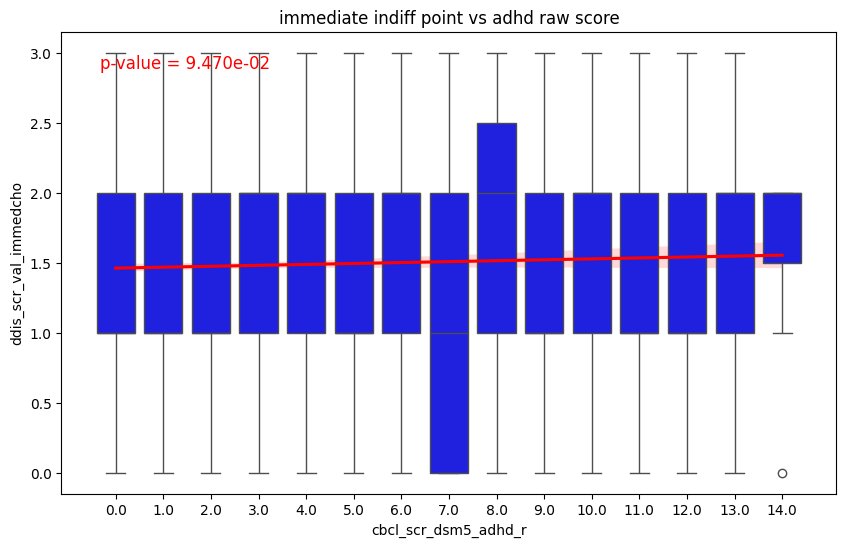

In [281]:
boxplot_ddis_vs_score(score_name, time_vars[0], cbcl_ddis_1y_filt, 'immediate indiff point')

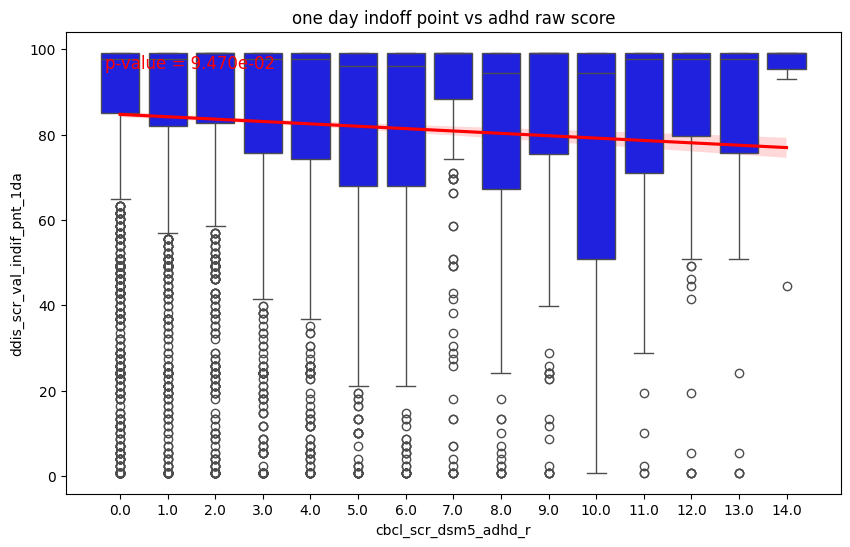

In [282]:
boxplot_ddis_vs_score(score_name, time_vars[1], cbcl_ddis_1y_filt, 'one day indoff point')

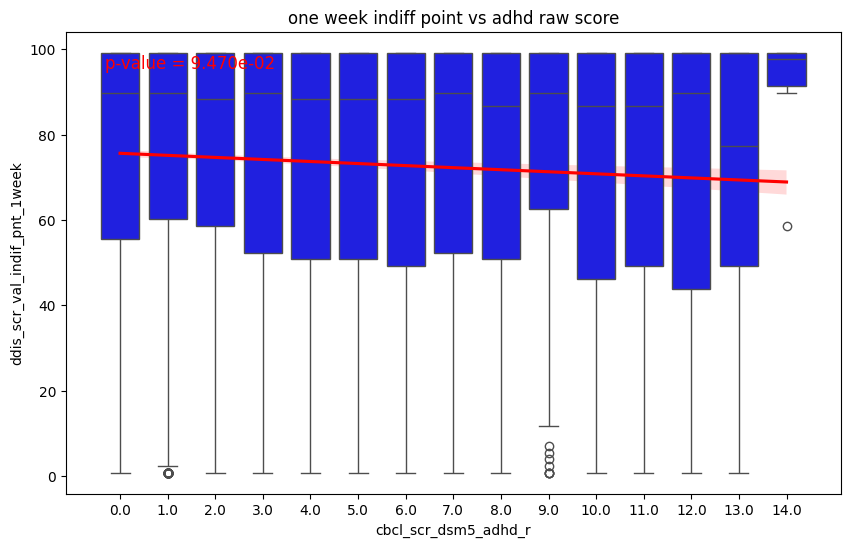

In [283]:
boxplot_ddis_vs_score(score_name, time_vars[7], cbcl_ddis_1y_filt, 'one week indiff point' )

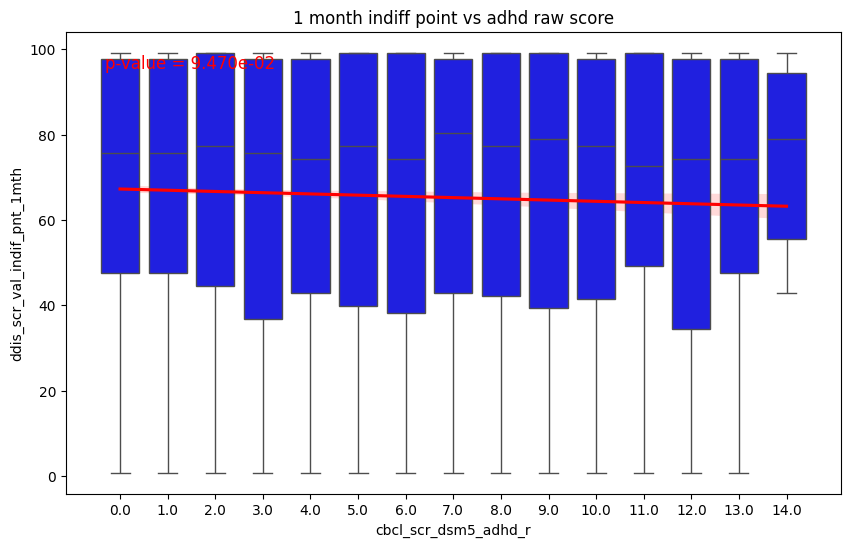

In [284]:
boxplot_ddis_vs_score(score_name, time_vars[30], cbcl_ddis_1y_filt, '1 month indiff point')

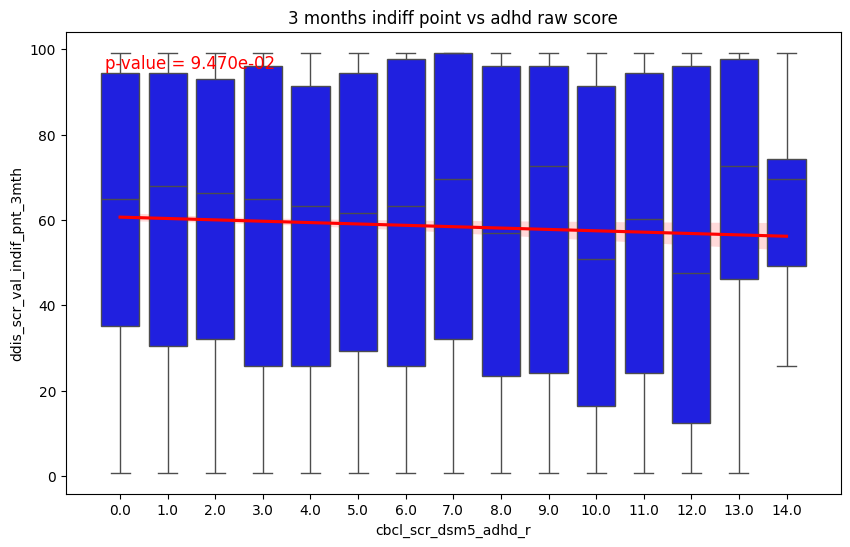

In [285]:
boxplot_ddis_vs_score(score_name, time_vars[90], cbcl_ddis_1y_filt, '3 months indiff point')

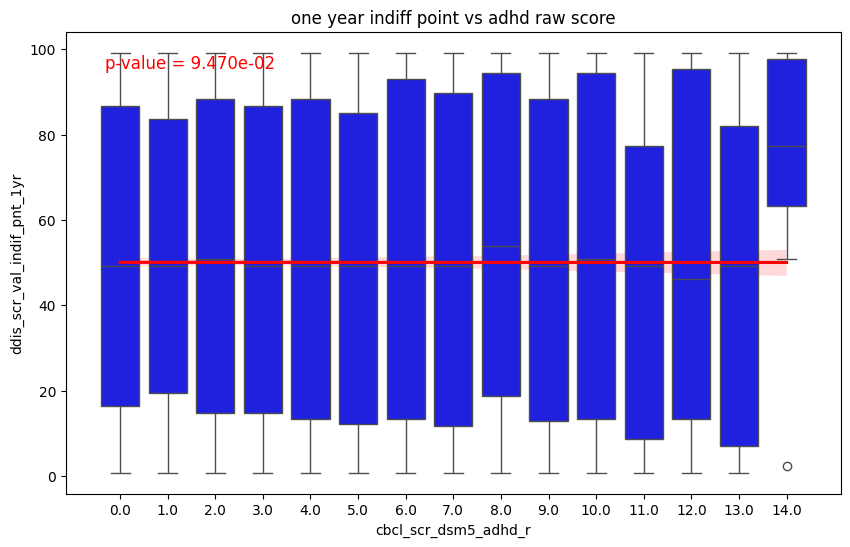

In [286]:
boxplot_ddis_vs_score(score_name, time_vars[365], cbcl_ddis_1y_filt, 'one year indiff point' )

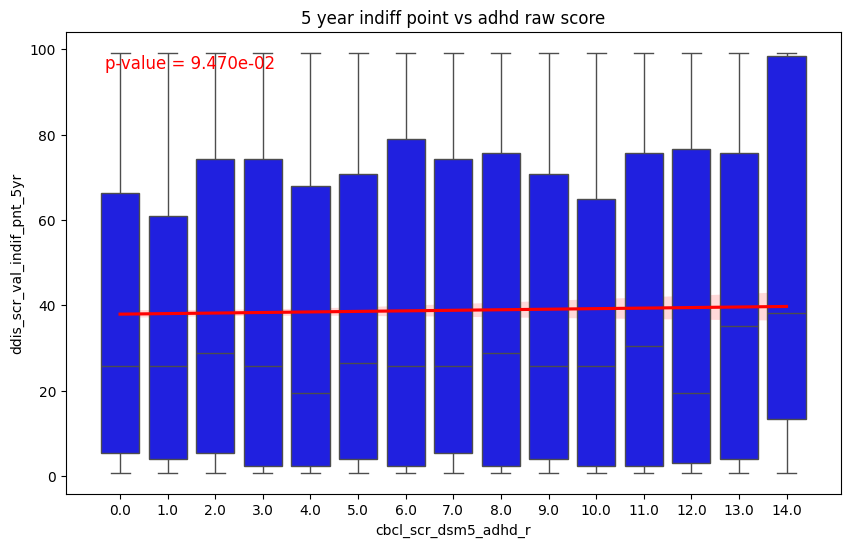

In [287]:
boxplot_ddis_vs_score(score_name, time_vars[1780], cbcl_ddis_1y_filt, '5 year indiff point')

### Discount rate

In [288]:
delay_disc

,src_subject_id,eventname,ddis_scr_script_startdte,ddis_scr_script_starttme,ddis_scr_subjectid,ddis_scr_session,ddis_scr_script_elaptme,ddis_scr_computer_platform,ddis_scr_values_completed,ddis_scr_param_delayrewamt,...,ddis_scr_val_indif_pnt_5yr,ddis_scr_expr_mnrt_allcho,ddis_scr_expr_medrt_allcho,ddis_scr_expr_mnrt_immcho,ddis_scr_expr_medrt_immedcho,ddis_scr_expr_mnrt_delaycho,ddis_scr_expr_medrt_delaycho,ddis_scr_val_cons_per_jbcrit1,ddis_scr_val_jbpass1_num_violations,ddis_scr_val_cons_per_jbcrit2
0,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,2019-09-16,11:13:51,NDAR_INV003RTV85 1_year_follow_up_y_arm_1 01,1,159143,ios,1,100,...,99.21875,1795.6428571428571103752,1428,NaN,NaN,1795.6428571428571103752,1428,yes,0.0,no
1,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,2021-08-04,10:36:31,ABCD_114SUW96 3_year_follow_up_y_arm_1 01,1,232326,and,1,100,...,49.21875,2510.1666666666665,2416,3318.5,2966,2257.5625,2240.5,yes,0.0,yes
2,NDAR_INV005V6D2C,1_year_follow_up_y_arm_1,2019-02-09,14:45:56,NDAR_INV005V6D2C 1_year_follow_up_y_arm_1 01,1,205675,ios,1,100,...,75.78125,1729,1454.5,1730.647059,1643,1727.88,1376,no,2.0,no
3,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,2021-02-12,18:41:32,ABCD_116W7E3D 3_year_follow_up_y_arm_1 01,1,249644,and,1,100,...,50.78125,2486.690476190476,1885.5,2037.692307692308,1540.5,3216.3125,2770,no,1.0,no
4,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,2020-05-12,16:15:57,ABCD_118X7I8C 3_year_follow_up_y_arm_1 01,1,191439,ios,1,100,...,5.46875,1252.85714285714,1189.0,1297.5,1180.5,1235.0,1189.0,yes,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19237,NDAR_INVZZPKBDAC,3_year_follow_up_y_arm_1,2021-01-30,16:15:20,ABCD_AAQLCEBD 3_year_follow_up_y_arm_1 01,1,174565,ios,1,100,...,99.21875,797.2619047619048,701,972,972,788.5249999999999,701,no,1.0,no
19238,NDAR_INVZZZ2ALR6,1_year_follow_up_y_arm_1,2018-06-28,18:21:28,NDAR_INVZZZ2ALR6 1_year_follow_up_y_arm_1 01,1,173620,ios,1,100,...,38.28125,1812.857143,1544.5,1917.052632,1694,1726.782609,1536,no,NaN,yes
19239,NDAR_INVZZZ2ALR6,3_year_follow_up_y_arm_1,2020-06-08,15:20:19,ABCD_AAA3BMS7 3_year_follow_up_y_arm_1 01,1,216465,ios,1,100,...,69.53125,1534.95238095238,1460.0,1641.94444444444,1460.0,1454.70833333333,1413.5,no,1.0,yes
19240,NDAR_INVZZZNB0XC,3_year_follow_up_y_arm_1,2020-05-09,12:45:53,ABCD_AAAOC1YD 3_year_follow_up_y_arm_1 01,1,239038,ios,1,100,...,30.46875,1328.47619047619,1133.0,1366.0625,1325.5,1305.34615384615,1004.0,yes,0.0,yes


In [289]:
def discount_rate( indiff_val, delayed_reward,  delay): # V = indiff value, a = delayed reward  , D = delay
    delay = np.full_like(indiff_val, 0.25)
    print(type(delayed_reward), type(indiff_val), type(delay))
    discount_rate = (delayed_reward - indiff_val ) / (indiff_val * delay)
    return discount_rate

In [290]:
delayed_reward = delay_disc[['src_subject_id', 'ddis_scr_param_delayrewamt']]
pd.to_numeric(delayed_reward['ddis_scr_param_delayrewamt'])
delayed_reward.dtypes

src_subject_id                object
ddis_scr_param_delayrewamt     int64
dtype: object

In [291]:
cbcl_ddis_1y_filt_discr = pd.merge(cbcl_ddis_1y_filt, delayed_reward, on='src_subject_id' )

In [292]:
delayed_reward = cbcl_ddis_1y_filt_discr['ddis_scr_param_delayrewamt']
delays = time_vars.keys()
delays
type(time_vars[0])

str

In [293]:
# unit of delay is days 
for dell in delays:
    delay = np.full_like(delayed_reward, dell)
    dicount_rate = discount_rate(cbcl_ddis_1y_filt_discr[time_vars[dell]], delayed_reward, delay)
    var_name = 'disc_rate_k' + str(dell)
    cbcl_ddis_1y_filt_discr[var_name] = dicount_rate
    


<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [294]:
cbcl_ddis_1y_filt_discr.keys()

Index(['src_subject_id', 'ddis_scr_val_immedcho',
       'ddis_scr_val_indif_point_6h', 'ddis_scr_val_indif_pnt_1da',
       'ddis_scr_val_indif_pnt_1week', 'ddis_scr_val_indif_pnt_1mth',
       'ddis_scr_val_indif_pnt_3mth', 'ddis_scr_val_indif_pnt_1yr',
       'ddis_scr_val_indif_pnt_5yr', 'cbcl_scr_dsm5_adhd_r',
       'ddis_scr_param_delayrewamt', 'disc_rate_k0', 'disc_rate_k0.25',
       'disc_rate_k1', 'disc_rate_k7', 'disc_rate_k30', 'disc_rate_k90',
       'disc_rate_k365', 'disc_rate_k1780'],
      dtype='object')

In [302]:
def boxplot_disc_rate_vs_score(score_name, delay, df): #delay in days
    plt.figure(figsize=(10,6))
    sns.boxplot(x= score_name, y='disc_rate_k' + str(delay), data=df, color='blue')
    #sns.stripplot(x=score_name, y=time_vars[0], data=cbcl_ddis_1y_filt, color='blue', jitter=True)
    sns.regplot(x= score_name, y='disc_rate_k' + str(delay), data=df, scatter=False, color='red')

    slope, intercept, r_value, p_value, std_err = ss.linregress(cbcl_ddis_1y_filt_discr[score_name], cbcl_ddis_1y_filt_discr['disc_rate_k1'])

    plt.xlabel(str(score_name))
    plt.ylabel('disc_rate_k' + str(delay))

    last_undersc = score_name.rfind('_')
    penult_undersc = score_name.rfind('_', 0, last_undersc)
    disorder_name = score_name[penult_undersc + 1:last_undersc] if penult_undersc != -1 and last_undersc != -1 else None


    if disorder_name is not None :
        plt.title('disc_rate_k' + str(delay) +' vs ' + disorder_name + ' raw score')
    else:
        plt.title('disc_rate_k' + str(delay)+ ' vs ' + score_name)
    plt.text(0.05, 0.95, f'p-value = {p_value:.3e}', transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='top')

    plt.show()

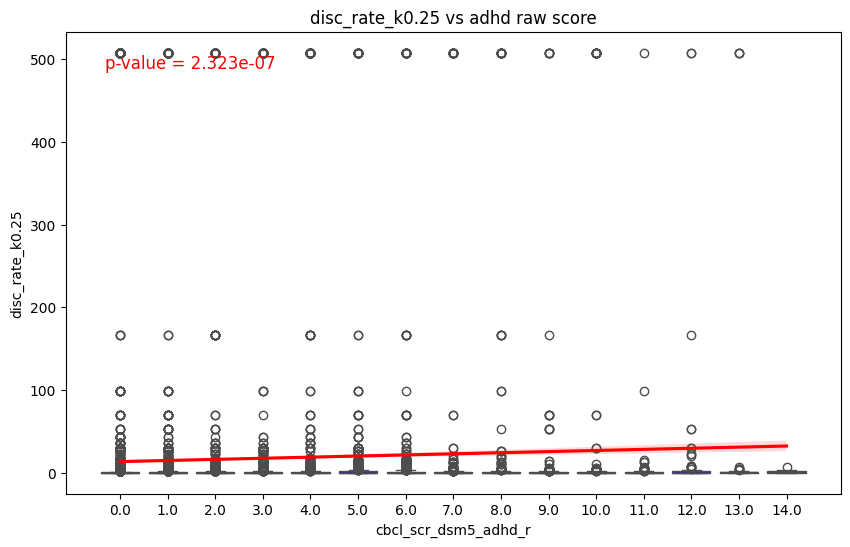

In [303]:
boxplot_disc_rate_vs_score(score_name, 0.25, cbcl_ddis_1y_filt_discr)

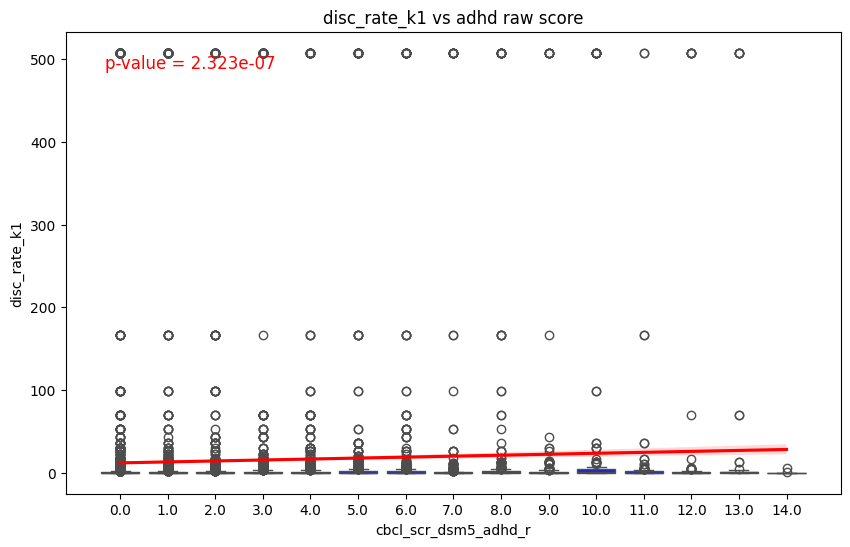

In [304]:
boxplot_disc_rate_vs_score(score_name, 1, cbcl_ddis_1y_filt_discr)

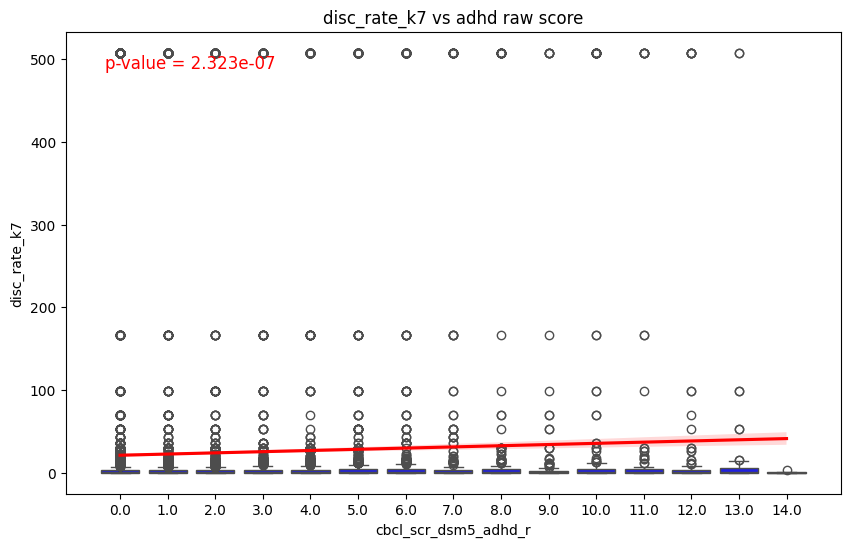

In [305]:
boxplot_disc_rate_vs_score(score_name, 7, cbcl_ddis_1y_filt_discr)

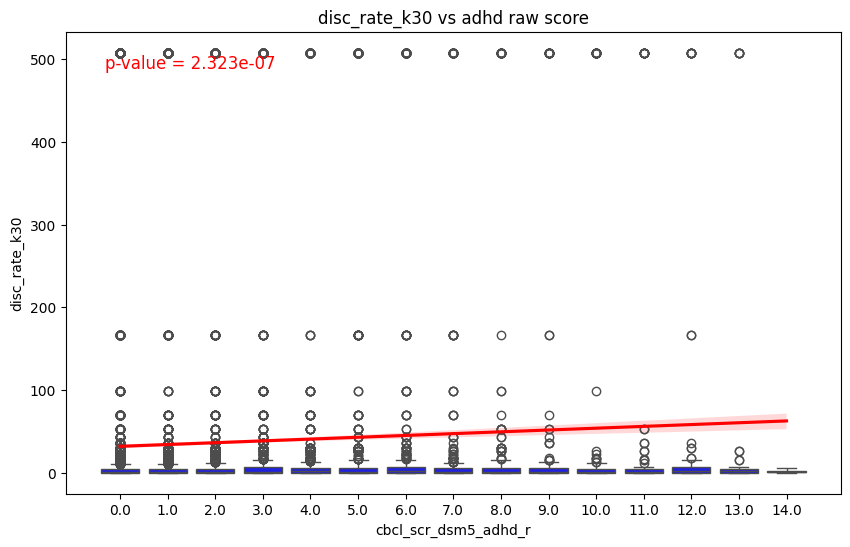

In [306]:
boxplot_disc_rate_vs_score(score_name, 30, cbcl_ddis_1y_filt_discr)

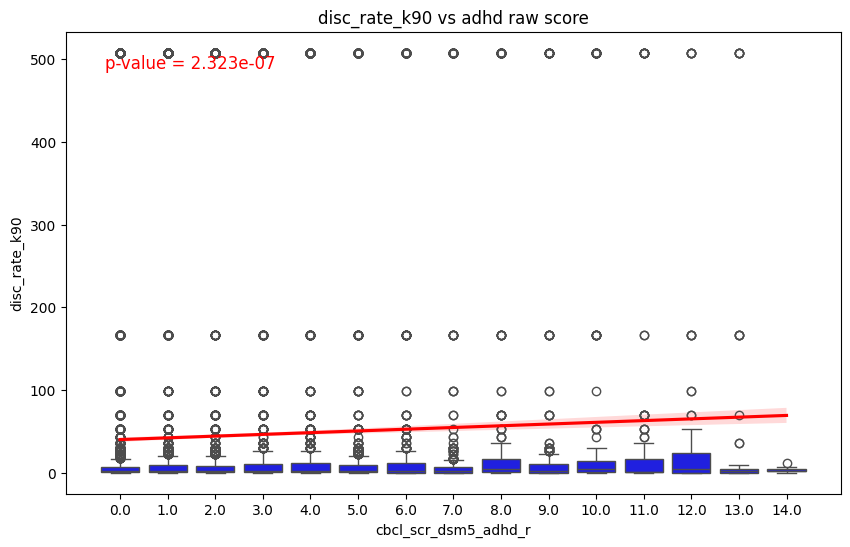

In [307]:
boxplot_disc_rate_vs_score(score_name, 90, cbcl_ddis_1y_filt_discr)

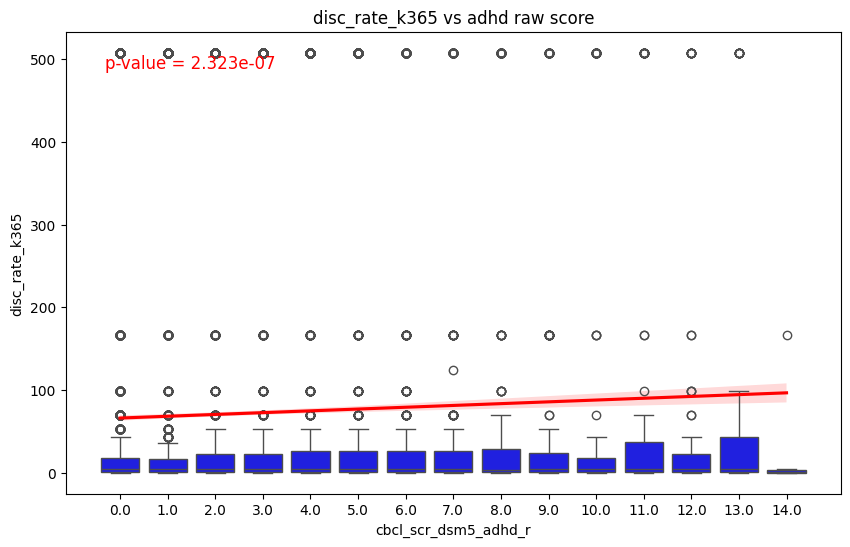

In [308]:
boxplot_disc_rate_vs_score(score_name, 365, cbcl_ddis_1y_filt_discr)

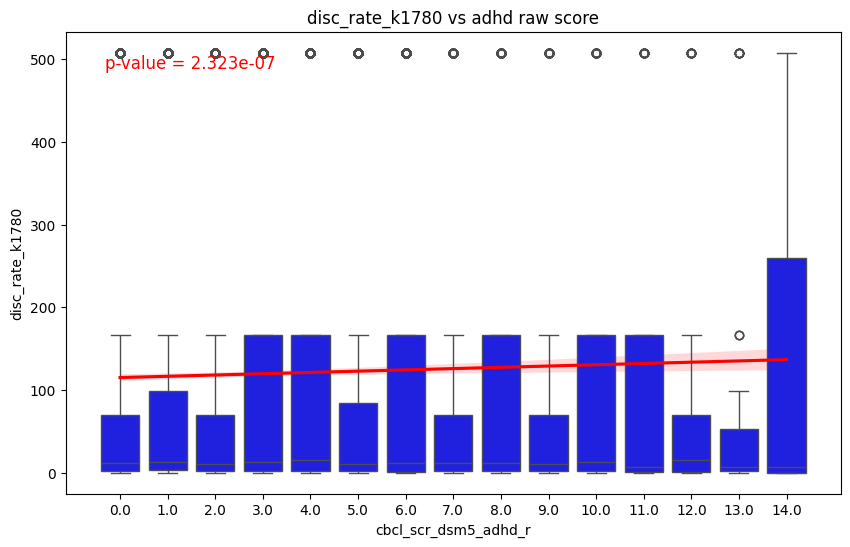

In [309]:
boxplot_disc_rate_vs_score(score_name, 1780, cbcl_ddis_1y_filt_discr)